In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
df = pd.read_csv('iris.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nShape of the dataset (rows, columns):", df.shape)

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics for numerical features:")
print(df.describe())


First 5 rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Shape of the dataset (rows, columns): (150, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Descriptive statistics for numerical features:
       sepal.l

In [2]:
duplicate_values=df.duplicated().sum()
duplicate_values

np.int64(1)

In [3]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [4]:
df = df.drop_duplicates()
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [5]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64

In [7]:
df['petal.length'].mean()

np.float64(3.7489932885906043)

#### Observations
- There are no null values
- Found 4 numerical values
- all the x columns are continues
- One Categorical value(Target)
- Here the numerical columns are independent and Target is the independent
- There are 3 types of Flowers among the dataset
- They are Setosa , Versicolor and Virginica
- There are no duplicate rows
- there are three flower categories(classes)
- Equal amount flower quantity in dataset

In [8]:
print(df['petal.length'].mean().round(2))
print(df['petal.width'].mean())
print(df['sepal.length'].mean())
print(df['sepal.width'].mean())

3.75
1.1946308724832218
5.843624161073825
3.059731543624161


In [9]:
df=df.reset_index(drop=True)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])  

df.head()  


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Observations
- for y column we can use lebel encoding 
- for x columns we use one hot encoding and also exceptionally we can use label encodong
- the taget columns(variety ) is still object type . it needs to be converted to numeric(int)

In [11]:
df['variety'] = pd.to_numeric(labelencoder.fit_transform(df['variety']))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


In [12]:



X = df.iloc[:, 0:4] 
y = df.iloc[:, -1]   

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


print("First 5 rows of X:\n", X.head())
print("First 5 values of y:\n", y.head())


Shape of X: (149, 4)
Shape of y: (149,)
First 5 rows of X:
    sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
First 5 values of y:
 0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: variety, Length: 149, dtype: int64

In [14]:
df.shape

(149, 5)

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


X_train.head()


Shape of X_train: (104, 4)
Shape of X_test: (45, 4)
Shape of y_train: (104,)
Shape of y_test: (45,)


,sepal.length,sepal.width,petal.length,petal.width
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
116,6.5,3.0,5.5,1.8


In [16]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion='entropy', max_depth=None)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

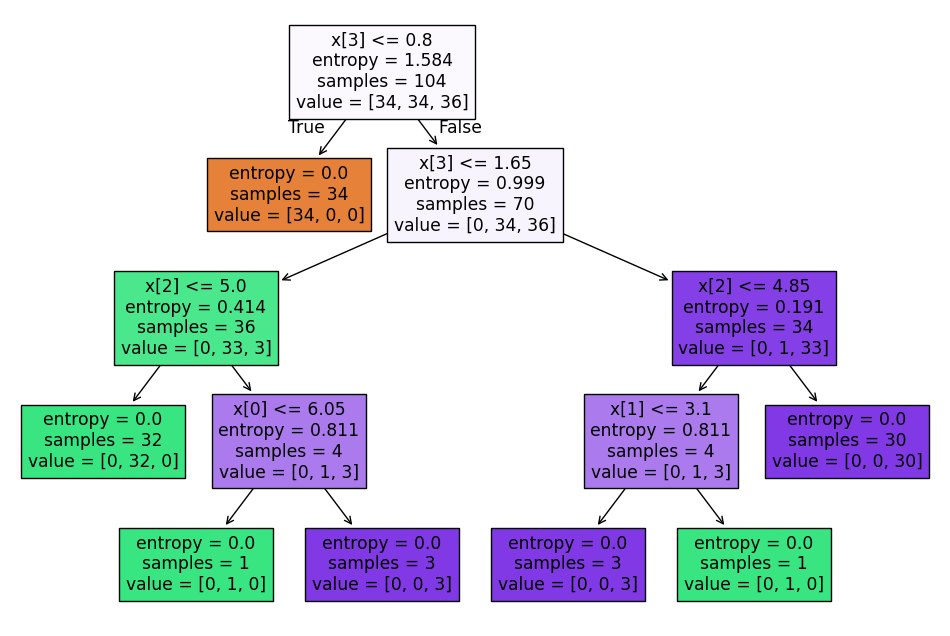

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8))  

# Plot decision tree
plot_tree(model, filled=True)  
plt.show()
